<a href="https://colab.research.google.com/github/patriciamedyna/Classifier_page/blob/main/Fastai_without_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 189 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 6.0 MB/s 


In [2]:
#hide
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 46 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 56.9 MB/s 
     |████████████████████████████████| 51 kB 347 kB/s 


In [3]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [4]:
from fastai.basics import *
from fastai.text.core import *
from fastai.text.data import *
from fastai.text.models.core import *
from fastai.text.models.awdlstm import *
from fastai.callback.rnn import *
from fastai.callback.progress import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#path = '/content/drive/MyDrive/Colab Notebooks/Tobacco_LSTM/layout/'

path = '/content/drive/MyDrive/Colab Notebooks/Tobacco_LSTM/layout//'
df_train = pd.read_csv(path + 'df_train_tags.csv', delimiter=',', error_bad_lines=False)

In [7]:
df_train.head()

,class,text,text_tags
0,FirstPage,"Dr. M.A. Manzelli, PHILIP MORRIS INC., Research Center, P.O. Box 3 D Richmond, Va. 23206 U.S.A. Dear Art, Please find enclosed a proposed program for your visit in Europe. As you will see, this program contains two major points: a) A two-days meeting in Neuchätel with all people in Europe involved in infestation control (proposed program included). b) Visit of all PM Europe production centers with the purpose of: - training people in Charge of the insect indenti-fication - inspection of the sanitary conditions One of our main problems is the insect Identification and ...","['\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob PHILIP MORRIS\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob EUROPE MIDDLE EAST AFRICA\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob RESEARCH AND DEVELOPMENT\n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_02 xxbob Neuchatel, duly 14, 1977\n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_01 xxbob Dr. M.A. Manzelli,\n', 'PHILIP MORRIS INC.,\n', 'Research Center,\n', 'P.O. Box 3 D\n', 'Richmond, Va. 23206\n', 'U.S.A. .\n', 'xxeob xxQ02_01\n', '\n', 'xxQ02_01 xxbob Dear Art,\n', 'xxeob xxQ02_01\n', '\n', 'xxQ03_01 xxbob xxbcet Please proposed pro..."
1,NextPage,"- 2 - Please let me krow if you have any changes for the proposed program. Looking forward to seeing you again, cc: Messrs. B. Kuhn E. Stoop Encl.: mentioned 1000035625","['\n', 'xxQ00_00 xxbob Please let krow if you have any changes for the proposed\n', 'me\n', 'program.\n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_00 xxbob Looking forward to seeing you again,\n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_02 xxbob Yours very truly,\n', '_.\n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_02 xxbob xxbcet \n', 'xxecet\n', 'xxeob xxQ02_03\n', '\n', 'xxQ02_02 xxbob .B. Boder\n', 'xxeob xxQ02_03\n', '\n', 'xxQ02_00 xxbob cc: Messrs. B. Kuhn\n', 'xxbcet E. Stoop\n', 'xxecet\n', 'xxeob xxQ02_01\n', '\n', 'xxQ02_00 xxbob Encl.: mentioned\n', 'xxeob xxQ03_01\n', '\n', 'xxQ04_01 xxbob we\n',..."
2,FirstPage,"I NOIJ-04-97 13 = 25 FROM = I D : PAGE 10/17 Wachtell, Lipton, Rosen & Katz MARTIN L1PTON HERBERT M. WaCHYCLL THEODORE GEWSRTZ »ERNA*» W, NUSSBAUM RICHARD O- HATCHER DOUGLAS Sr LieBKAfSKV STEVEN M. SAR NA CMARt.CS T. MEPCRR'GK CHAIN J. FOPTCANG pBTRR C. 1AMCLLDS MICHAEL w. SCHWÄRT* Al.LAR A- MARTIN BARRV A. BRrCR IAWREHCE □. PEDQrWITZ ROBERT 0. MAZUR PAUL VIZGARRÖMSCK JR. PCTCR G- HCIM hAROlD s. «OViKOFF DAVID M. EINHORN KENNET« B. FQRREST METER C. KOPLOW THEODORE M- MIRVIS EDWARD D. MERL1HT RICHARD D. FEINTUCH DANIEL A. NEPP ERIC M. ROTR WAHREN R. STERN ANDREW R. BROWN ST EIN MICHAEL H...","['\n', 'xxQ00_00 xxbob NOU-04-87 15:26 FROM:\n', 'e\n', 'xxeob xxQ00_01\n', '\n', 'xxQ00_00 xxbob MARTIN LIPTON\n', 'MERBERY ot waAcHTELL\n', 'TNROPORE GGWERTZ\n', 'BEAWARD W. NUSSRAUM\n', 'RIGMARD D. KATOKER\n', 'COUCLAT Fr MERHAPEKY\n', 'STEVEN M. GARNA\n', 'CMARLES T. MEDERRICK\n', 'SAIN y. FORTEANG\n', 'PeveR &. CANCLLOS\n', 'HIGMASR We SCRWARTE\n', 'ALLAN A. MARTIN\n', 'BARRY 4. BRYER\n', 'LAWRENCE 5. PEDOWITZ\n', 'ROBERT ©. haZUR\n', 'PAUL VIZGARRONDG, J.\n', 'PRIGR G. MEIN\n', 'MARGLD & HOVIKOFF\n', 'DAVID H. EERHORK\n', 'KENNETH B. PORREST\n', 'KEYER ¢. KOPLOW\n', 'THEODORE N. MIRV..."
3,FirstPage,"i PHILIP .MORRIS INCORPORATED 120 PARK AVENUE, N EW YORK. N. Y. 10017 John T.-Landhy SENIOR VICC PRESIDENT _ , r . n n - . oirector of Marketing February 15, 19 83 Dear Ms. Ober: Your letter of February 3 was received by this Office yesterday. We attempted to reach you by telephone iinmediately but were unable to find a listed number in New Haven. I had hoped to arrange an appointment for one of our executives to discuss with you and your concerned ...","['\n', 'xxQ00_00 xxbob ee\n', 'xxeob xxQ00_00\n', '\n', 'xxQ00_01 xxbob PHILIP MORRIS\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob INCORPORATED\n', '120 PARK AVENUE, NEW YORK.N. ¥. 10017\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob Joun T.-Lanpry\n', 'xxbcet ee or ne February 15, 1983~\n', 'xxecet\n', 'xxeob xxQ01_0

In [8]:
#path = '/content/drive/MyDrive/Colab Notebooks/Tobacco_LSTM/layout/'
df_test = pd.read_csv(path + 'test_tags.csv', delimiter=',', error_bad_lines=False)

In [9]:
df_test

,binder,docid,class,text,text_tags
0,Tobacco800,tkj51f00_1,FirstPage,"rii.E ^litl' karg;; , 1980 ■'!?.!r- ■ !T |Sf: .'■■ J -1 p '■Mr'"" trr*. my MAILLARD REACTION ""A"" FLAVOR COMPONENTS./ A ] 5 6 *! •• f ----------------------------------------- ! i f i wii'.ii ■. , . j i i F; tp...' t/ t-■ l. ■i. v.' i -!* .i■ uill .,0'; [o,.' ' ’. Identification of flavor components in the ütjiieous la...","['\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob h Department\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob MARCH 26, 1986\n', 'FILE NOTL\n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_02 xxbob \n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_02 xxbob Pare}\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob COMPONERTS/415_& St\n', 'MATLLARD REACTION “Al! FLAVOR\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_02 xxbob Fisgert, af Grove AG GALLON Toe lo. 1\n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_00 xxbob the layer of the Mailiare\n', 'Jdentification of flavor components in aqueous\n', 'this communicati..."
1,Tobacco800,tkj51f00_2,NextPage,FIGURE I GAS CHROMATOGRAF!,"['\n', 'xxQ01_02 xxbob \n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ02_01 xxbob \n', 'xxeob xxQ02_02\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_02\n', '\n', 'xxQ00_00 xxbob \n', 'xxeob xxQ01_00\n', '\n', 'xxQ02_02 xxbob \n', 'xxeob xxQ03_02\n', '\n', 'xxQ02_01 xxbob xxbcet \n', 'xxecet\n', 'xxeob xxQ03_03\n', '\n', 'xxQ02_01 xxbob \n', 'xxeob xxQ02_03\n', ..."
2,Tobacco800,tkj51f00_3,NextPage,"TABLE 1 Subfraction Ho. Gdc]~ T r a n s i t i o n During H_lnt j_wn 1 Floral 2 Mi.lk chocolate, sweet 3 Cocoa, floral 4 ChocoJatc , weak cocoa. strong cocoa 5 Sweet cocoa, sweet fruity, cooked fruity, green itasty 6 Green and chocolate, faint cocoa, sweet, sharp green, green bell pepper, sweet nutty, burnt bready nutty, bready sweet, sweet green 7 Green pepper, sharp ranci...","['\n', 'xxQ00_00 xxbob \n', 'xxeob xxQ01_00\n', '\n', 'xxQ00_00 xxbob Subfraction No.\n', 'xxeob xxQ00_00\n', '\n', 'xxQ00_00 xxbob Dw wn\n', 'fF\n', 'xxeob xxQ01_00\n', '\n', 'xxQ02_00 xxbob xxbcet 10\n', 'xxecet\n', 'xxbcet ll\n', 'xxecet\n', 'xxbcet 12\n', 'xxecet\n', 'xxeob xxQ02_00\n', '\n', 'xxQ02_00 xxbob xxbcet 13\n', 'xxecet\n', 'xxbcet 14\n', 'xxecet\n', 'xxbcet 45\n', 'xxecet\n', 'xxeob xxQ03_00\n', '\n', 'xxQ03_00 xxbob xxbcet 16\n', 'xxecet\n', 'xxeob xxQ03_00\n', '\n', 'xxQ00_01 xxbob xxbcet TABLE 1\n', 'xxecet\n', 'xxeob xxQ00_01\n', '\n', 'xxQ00_01 xxbob Floral\n', 'Milk c..."
3,Tobacco800,tkj51f00_4,NextPage,"Tab u 1 J Subfraction // 3 8 Components Identified Re 1 . Abnndai 2-mettiy 1 pro p anal 3-methylbutanal 2-methylbutanal 2-hexero 1-isocyanatopropane 2,5-dimethylfuran 2-methyl-N - (2-methylpropylidcne)-1-propanainine cyclohexane 2,3-pentandione pyrazine 3-penten-2-one pyridine phenol cyclopentanone 4-me thyl-2-hexene methyIcyclobexane 2-jmethylpy r idine cyclohexanone meLhylphenol 2-methyl-N-(2-methy1propylidene)-1-propanamine ethylbenzene 2-piperidine methatieamine 1-hydroxy-2-propancne 2-methyl-l-pentcne methylpyrazine ethenylbenzem- 2,5-dimethyl pyrazine 2-imitlo-cy c lnpentane o...","['\n', 'xxQ00_01 xxbob Tabie 1]\n', 'xxeob xxQ00_01\n', '\n', 'xxQ00_00 xxbob i! Identified Rel, Abundance\n', 'Subfraction Components\n', '4 2-methylpropana!\n', '! 3-methylbutanal\n', '| 2-mwethylbutanal\n', ': 2-hexenc\n', 'l-isocyanatopropane\n', '2,5-dimethylfuran\n', '2-methy1-N-(2-methylpropylidene)-1-propanamine\n', '5 cyclohexane\n', '2, 3-pentandione\n', 'pyrazine\n', '3-penten-2-one\n', 'pyridine\n', 'phenol\n', 'cyclopentanone\n', '4-methyl-2-hexcne\n', 'methyleyclohexane\n', '2omethylpyridine\n', 'cyclohexanone\n', 'methylphenol\n', '2-methy1-N-(2-methy lpropylidene) -1-propan..."
4,Tobacco800,tkj51f00_5,NextPage,Talj.lt’ IT Subfraction ii Components Identified Re] . Abundance 7 tyclohexane ++ 

In [10]:
df_test.shape

(259, 5)

In [11]:
data = df_test.drop(columns='docid')

In [12]:
df_test = data.drop(columns='binder')

In [15]:
unsup_tags = df_test.drop(columns='class')

In [16]:
unsup_tags.head()

,text,text_tags
0,"rii.E ^litl' karg;; , 1980 ■'!?.!r- ■ !T |Sf: .'■■ J -1 p '■Mr'"" trr*. my MAILLARD REACTION ""A"" FLAVOR COMPONENTS./ A ] 5 6 *! •• f ----------------------------------------- ! i f i wii'.ii ■. , . j i i F; tp...' t/ t-■ l. ■i. v.' i -!* .i■ uill .,0'; [o,.' ' ’. Identification of flavor components in the ütjiieous la...","['\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob h Department\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob MARCH 26, 1986\n', 'FILE NOTL\n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_02 xxbob \n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_02 xxbob Pare}\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob COMPONERTS/415_& St\n', 'MATLLARD REACTION “Al! FLAVOR\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_02 xxbob Fisgert, af Grove AG GALLON Toe lo. 1\n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_00 xxbob the layer of the Mailiare\n', 'Jdentification of flavor components in aqueous\n', 'this communicati..."
1,FIGURE I GAS CHROMATOGRAF!,"['\n', 'xxQ01_02 xxbob \n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ02_01 xxbob \n', 'xxeob xxQ02_02\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_02\n', '\n', 'xxQ00_00 xxbob \n', 'xxeob xxQ01_00\n', '\n', 'xxQ02_02 xxbob \n', 'xxeob xxQ03_02\n', '\n', 'xxQ02_01 xxbob xxbcet \n', 'xxecet\n', 'xxeob xxQ03_03\n', '\n', 'xxQ02_01 xxbob \n', 'xxeob xxQ02_03\n', ..."
2,"TABLE 1 Subfraction Ho. Gdc]~ T r a n s i t i o n During H_lnt j_wn 1 Floral 2 Mi.lk chocolate, sweet 3 Cocoa, floral 4 ChocoJatc , weak cocoa. strong cocoa 5 Sweet cocoa, sweet fruity, cooked fruity, green itasty 6 Green and chocolate, faint cocoa, sweet, sharp green, green bell pepper, sweet nutty, burnt bready nutty, bready sweet, sweet green 7 Green pepper, sharp ranci...","['\n', 'xxQ00_00 xxbob \n', 'xxeob xxQ01_00\n', '\n', 'xxQ00_00 xxbob Subfraction No.\n', 'xxeob xxQ00_00\n', '\n', 'xxQ00_00 xxbob Dw wn\n', 'fF\n', 'xxeob xxQ01_00\n', '\n', 'xxQ02_00 xxbob xxbcet 10\n', 'xxecet\n', 'xxbcet ll\n', 'xxecet\n', 'xxbcet 12\n', 'xxecet\n', 'xxeob xxQ02_00\n', '\n', 'xxQ02_00 xxbob xxbcet 13\n', 'xxecet\n', 'xxbcet 14\n', 'xxecet\n', 'xxbcet 45\n', 'xxecet\n', 'xxeob xxQ03_00\n', '\n', 'xxQ03_00 xxbob xxbcet 16\n', 'xxecet\n', 'xxeob xxQ03_00\n', '\n', 'xxQ00_01 xxbob xxbcet TABLE 1\n', 'xxecet\n', 'xxeob xxQ00_01\n', '\n', 'xxQ00_01 xxbob Floral\n', 'Milk c..."
3,"Tab u 1 J Subfraction // 3 8 Components Identified Re 1 . Abnndai 2-mettiy 1 pro p anal 3-methylbutanal 2-methylbutanal 2-hexero 1-isocyanatopropane 2,5-dimethylfuran 2-methyl-N - (2-methylpropylidcne)-1-propanainine cyclohexane 2,3-pentandione pyrazine 3-penten-2-one pyridine phenol cyclopentanone 4-me thyl-2-hexene methyIcyclobexane 2-jmethylpy r idine cyclohexanone meLhylphenol 2-methyl-N-(2-methy1propylidene)-1-propanamine ethylbenzene 2-piperidine methatieamine 1-hydroxy-2-propancne 2-methyl-l-pentcne methylpyrazine ethenylbenzem- 2,5-dimethyl pyrazine 2-imitlo-cy c lnpentane o...","['\n', 'xxQ00_01 xxbob Tabie 1]\n', 'xxeob xxQ00_01\n', '\n', 'xxQ00_00 xxbob i! Identified Rel, Abundance\n', 'Subfraction Components\n', '4 2-methylpropana!\n', '! 3-methylbutanal\n', '| 2-mwethylbutanal\n', ': 2-hexenc\n', 'l-isocyanatopropane\n', '2,5-dimethylfuran\n', '2-methy1-N-(2-methylpropylidene)-1-propanamine\n', '5 cyclohexane\n', '2, 3-pentandione\n', 'pyrazine\n', '3-penten-2-one\n', 'pyridine\n', 'phenol\n', 'cyclopentanone\n', '4-methyl-2-hexcne\n', 'methyleyclohexane\n', '2omethylpyridine\n', 'cyclohexanone\n', 'methylphenol\n', '2-methy1-N-(2-methy lpropylidene) -1-propan..."
4,Talj.lt’ IT Subfraction ii Components Identified Re] . Abundance 7 tyclohexane ++ 2.2-dinethyl-hexanf' + oxi ran eite thanol + *cyclopentene ++ 2-methy1-2-cycT openten-l-onc + l-(2-furanyl)-ethanone ++ furan...,"['\n', 'xxQ00_00 xxbob Subfraction #\n', 'xxe

In [17]:
unsup_tags.to_csv('unsup_tags.csv',encoding='utf-8', index=False)

In [18]:
unsup_tags = pd.read_csv(path + 'unsup_tags.csv', delimiter=',', error_bad_lines=False)

In [19]:
unsup_tags

,text,text_tags
0,"rii.E ^litl' karg;; , 1980 ■'!?.!r- ■ !T |Sf: .'■■ J -1 p '■Mr'"" trr*. my MAILLARD REACTION ""A"" FLAVOR COMPONENTS./ A ] 5 6 *! •• f ----------------------------------------- ! i f i wii'.ii ■. , . j i i F; tp...' t/ t-■ l. ■i. v.' i -!* .i■ uill .,0'; [o,.' ' ’. Identification of flavor components in the ütjiieous la...","['\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob h Department\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob MARCH 26, 1986\n', 'FILE NOTL\n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_02 xxbob \n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_02 xxbob Pare}\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob COMPONERTS/415_& St\n', 'MATLLARD REACTION “Al! FLAVOR\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_02 xxbob Fisgert, af Grove AG GALLON Toe lo. 1\n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_00 xxbob the layer of the Mailiare\n', 'Jdentification of flavor components in aqueous\n', 'this communicati..."
1,FIGURE I GAS CHROMATOGRAF!,"['\n', 'xxQ01_02 xxbob \n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ02_01 xxbob \n', 'xxeob xxQ02_02\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_03\n', '\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_01 xxbob \n', 'xxeob xxQ01_02\n', '\n', 'xxQ00_00 xxbob \n', 'xxeob xxQ01_00\n', '\n', 'xxQ02_02 xxbob \n', 'xxeob xxQ03_02\n', '\n', 'xxQ02_01 xxbob xxbcet \n', 'xxecet\n', 'xxeob xxQ03_03\n', '\n', 'xxQ02_01 xxbob \n', 'xxeob xxQ02_03\n', ..."
2,"TABLE 1 Subfraction Ho. Gdc]~ T r a n s i t i o n During H_lnt j_wn 1 Floral 2 Mi.lk chocolate, sweet 3 Cocoa, floral 4 ChocoJatc , weak cocoa. strong cocoa 5 Sweet cocoa, sweet fruity, cooked fruity, green itasty 6 Green and chocolate, faint cocoa, sweet, sharp green, green bell pepper, sweet nutty, burnt bready nutty, bready sweet, sweet green 7 Green pepper, sharp ranci...","['\n', 'xxQ00_00 xxbob \n', 'xxeob xxQ01_00\n', '\n', 'xxQ00_00 xxbob Subfraction No.\n', 'xxeob xxQ00_00\n', '\n', 'xxQ00_00 xxbob Dw wn\n', 'fF\n', 'xxeob xxQ01_00\n', '\n', 'xxQ02_00 xxbob xxbcet 10\n', 'xxecet\n', 'xxbcet ll\n', 'xxecet\n', 'xxbcet 12\n', 'xxecet\n', 'xxeob xxQ02_00\n', '\n', 'xxQ02_00 xxbob xxbcet 13\n', 'xxecet\n', 'xxbcet 14\n', 'xxecet\n', 'xxbcet 45\n', 'xxecet\n', 'xxeob xxQ03_00\n', '\n', 'xxQ03_00 xxbob xxbcet 16\n', 'xxecet\n', 'xxeob xxQ03_00\n', '\n', 'xxQ00_01 xxbob xxbcet TABLE 1\n', 'xxecet\n', 'xxeob xxQ00_01\n', '\n', 'xxQ00_01 xxbob Floral\n', 'Milk c..."
3,"Tab u 1 J Subfraction // 3 8 Components Identified Re 1 . Abnndai 2-mettiy 1 pro p anal 3-methylbutanal 2-methylbutanal 2-hexero 1-isocyanatopropane 2,5-dimethylfuran 2-methyl-N - (2-methylpropylidcne)-1-propanainine cyclohexane 2,3-pentandione pyrazine 3-penten-2-one pyridine phenol cyclopentanone 4-me thyl-2-hexene methyIcyclobexane 2-jmethylpy r idine cyclohexanone meLhylphenol 2-methyl-N-(2-methy1propylidene)-1-propanamine ethylbenzene 2-piperidine methatieamine 1-hydroxy-2-propancne 2-methyl-l-pentcne methylpyrazine ethenylbenzem- 2,5-dimethyl pyrazine 2-imitlo-cy c lnpentane o...","['\n', 'xxQ00_01 xxbob Tabie 1]\n', 'xxeob xxQ00_01\n', '\n', 'xxQ00_00 xxbob i! Identified Rel, Abundance\n', 'Subfraction Components\n', '4 2-methylpropana!\n', '! 3-methylbutanal\n', '| 2-mwethylbutanal\n', ': 2-hexenc\n', 'l-isocyanatopropane\n', '2,5-dimethylfuran\n', '2-methy1-N-(2-methylpropylidene)-1-propanamine\n', '5 cyclohexane\n', '2, 3-pentandione\n', 'pyrazine\n', '3-penten-2-one\n', 'pyridine\n', 'phenol\n', 'cyclopentanone\n', '4-methyl-2-hexcne\n', 'methyleyclohexane\n', '2omethylpyridine\n', 'cyclohexanone\n', 'methylphenol\n', '2-methy1-N-(2-methy lpropylidene) -1-propan..."
4,Talj.lt’ IT Subfraction ii Components Identified Re] . Abundance 7 tyclohexane ++ 2.2-dinethyl-hexanf' + oxi ran eite thanol + *cyclopentene ++ 2-methy1-2-cycT openten-l-onc + l-(2-furanyl)-ethanone ++ furan...,"['\n', 'xxQ00_00 xxbob Subfraction #\n', 'xxe

## Create DataLoader

In [11]:
def get_features(r):

  return r['text']

def get_labels(r):

  return r['class']

In [12]:
tobacco_clas = DataBlock(
    blocks=(TextBlock.from_df('text', seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dls = tobacco_clas.dataloaders(df_train, bs=64)
dls.show_batch(max_n=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxup u ) ö tn t ; ( fi a « o ri o o u xxmaj lj o ü - ] ■ xxup vd ( ji rl xxunk < u o p cj o i m i y 4j o ■ h f i xxmaj hl < ; < h o 4 > si tu o m xxup xxunk , | > xxunk fl tj * xxmaj xxunk o o n fi xxup xxunk ri tj o fl to ö » * * o to * fi « 1 < l > -h > « 3 e > p xxunk rh ft 4j xxmaj fh m | > o / ■ > 0 xxunk rj 0 < 9 , ri xxup hj < i > o xxup cd < il it . 5 xxunk xxup cj xxmaj pi fh j • tn d xxmaj vi * ■ .",NextPage
1,"xxbos xxunk xxmaj federal xxmaj register / xxmaj vol . 45 . xxmaj no . 7 l xxmaj xxunk . xxmaj xxunk 10 , xxunk / xxmaj xxunk xxmaj tb 1 ml xxunk 1 xxmaj xxunk xxunk - xxunk xxup xxunk ) , « ! ( xxunk xxmaj xxunk » sf xxmaj xxunk xxunk xxmaj xxunk l c ta xxmaj xxunk # tm xxup mh « far .. . ti 10 xxmaj xxunk xxunk » - « or … … .. ■ . xxrep 3 - * * "" 3 w * . » xxunk . 1 0 « xxmaj xxunk . xxrep 4 - - xxmaj xxunk xxunk xxmaj mt * … … .. » 0 « xxunk … xxunk : f 01 ■ mt xxmaj xxunk i 04 xxunk - - xxmaj xxunk xxmaj al ! » * 5 04 xxunk xxup ta » xxunk xxrep 3 -",NextPage


## Classification Model

In [13]:
from fastai.text.all import *

In [14]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

In [15]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.723099,0.613903,0.334951,0.665049,1.847628,00:04


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.539105,0.452773,0.213592,0.786408,1.572666,00:07
1,0.479857,0.362132,0.160194,0.839806,1.436388,00:07
2,0.422178,0.309559,0.106796,0.893204,1.362824,00:07
3,0.367210,0.282122,0.092233,0.907767,1.325940,00:07


In [16]:
learn.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.249913,0.280177,0.092233,0.907767,1.323364,00:03


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.231828,0.329774,0.106796,0.893204,1.390654,00:07
1,0.243157,0.299737,0.087379,0.912621,1.349504,00:07
2,0.229297,0.354965,0.101942,0.898058,1.426131,00:07
3,0.238149,0.374746,0.126214,0.873786,1.454622,00:07
4,0.223446,0.363652,0.131068,0.868932,1.438574,00:07
5,0.206856,0.450040,0.135922,0.864078,1.568375,00:07
6,0.181786,0.376431,0.101942,0.898058,1.457075,00:07
7,0.160518,0.379261,0.092233,0.907767,1.461204,00:07
8,0.142129,0.376900,0.097087,0.902913,1.457759,00:07
9,0.127008,0.371812,0.087379,0.912621,1.450361,00:07


In [17]:
learn.show_results()

,text,category,category_
0,"xxbos xxunk xxmaj federal xxmaj register i xxmaj vol . < 5 . xxmaj no . 7 / xxmaj xxunk . xxmaj xxunk 10 , xxunk / xxmaj xxunk ( b ) xxmaj whether each » xxunk bat xxunk xxunk of xxunk group . 2 . xxmaj to xxunk xxunk xxunk to the • xxunk of xxup po ) to xxunk the needs of xxunk proposed xxunk area : ( a ) xxmaj whether the xxunk ! xxunk xxunk of agriculture and labor in xxunk - xxunk « . xxmaj xxunk ; ( b ] xxmaj whether the xxunk xxunk xxunk xxmaj problems xxunk of xxmaj ms xxmaj community of xxunk . j xxmaj to determine « xxunk xxmaj xxunk xxmaj xxunk - xxunk xxmaj is xxunk xxunk lo xxunk and xxmaj operate the proposed xxunk , 4- xxmaj to determine whether xxunk xxmaj broadcasting xxmaj inc . is financial",NextPage,NextPage
1,"xxbos xxunk rightfax xxup xxunk xxup company : xxup martin lipton xxunk xxup m. xxup xxunk xxup xxunk ti - xxunk xxunk xxunk xxup w - xxunk xxmaj richard u , xxunk xxup douglas xxup s. t , xxunk xxup m. xxup xxunk xxup xxunk xxup j. xxup fortgang xxunk , ff xxup c. xxup xxunk xxup michael xxup w. xxunk xxup xxunk xxup a. xxup martin xxunk xxup a. xxunk xxup lawrence 0- xxup xxunk xxunk - f rt , xxunk xxup paul xxup xxunk . xxup jr . xxunk xxup c. xxup xxunk xxup harold xxup s. xxunk xxup david xxup m. xxup einhorn xxunk xxup c. xxup xxunk t xxunk ö. xxup kqplow xxup theodore xxup n > xxup xxunk 's £ pw xxup aro □ . xxup xxunk xxup xxunk xxup o , xxup feintuch xxunk a. xxunk xxunk > c xxup m. » xxunk xxunk",FirstPage,FirstPage
2,"xxbos i xxunk xxunk xxup herbert xxup m. xxup wachtell xxup theodore xxup gewertz xxup bernard xxup w. xxup nussbaum xxup richard xxup o. xxup xxunk xxup douglas xxup s. xxup xxunk xxup steven xxup m * xxup bar xxup na xxup chaim xxup j * xxup fortgang xxup peter xxup c * xxup canellos xxup michael xxup w * xxunk xxup allan xxup a. xxup martin xxup barry xxup a. xxunk xxup lawrence xxup b- xxup xxunk xxup robert xxup b. xxup mazur xxup paul xxunk , xxmaj jfl . xxup peter xxup c. xxup hein xxup harold 5 . xxup xxunk xxup david xxup m * xxup einhorn xxup xxunk xxup b , xxup forrest xxup meyer xxup g. xxup koplow xxup theodore xxup n * xxup xxunk xxup edward xxup d * xxup xxunk xxup richard xxup d. xxunk xxup daniel xxup a. xxup neff xxup eric",FirstPage,FirstPage
3,"xxbos 02 / 24 / 99 11:29 xxunk xxup lipton xxunk xxup xxunk xxup in xxup lipton xxup herbert xxup m. xxup wachte . xxup ll xxunk xxunk * xxup bernard w , xxup xxunk « xxup richard xxup d. xxup kat xxup cmc n xxup xxunk xxup e , xxunk xxup steven xxup m , « ar xxup na xxup xxunk xxup j. xxunk xxunk xxup c. canellos xxup michael w. xxup xxunk xxup allah xxup a- xxup martin » xxunk xxup a. xxunk » xxmaj lawrence b. xxunk xxup robert 8 , xxup xxunk » aul xxup xxunk xxup xxunk , xxup jr . xxup peter xxup c. xxup hein xxup xxunk xxup s. xxup xxunk xxup oaviq xxup m. xxup einhorn xxup xxunk * ■ xxup xxunk t xxunk xxup o * xxunk xxup xxunk » xxup n. xxup mi « vi 's xxup edward xxup d-",FirstPage,FirstPage
4,"xxbos xxup wlrk rightfax xxmaj server 5 / 28 / 99 5:12 : xxup page xxunk / 6 xxmaj xxunk xxmaj wilson company : lorillard xxmaj tobacco xxmaj company rightfax xxup xxunk tl > ton xxup m. xxup xxunk xxup xxunk xxunk xxunk w * xxunk xxunk xxup d. xxunk xxup xxunk 5 . xxup xxunk xxup steven xxup m * . xxup bar xxup na xxunk £ xxup fortgang xxup pe xxup ter xxup c , xxunk xxunk . w » xxunk xxmaj allah a « xxunk xxunk a ! xxunk xxunk ■ - xxunk xxunk # xxunk xxup hai xxunk xxup paul xxunk , xxup jr . xxup peter xxunk xxup xxunk xxunk david % xxup einhorn xxunk . xxunk xxunk xxunk xxup xxunk xxrep 3 o xxup xxunk xxup n. xxup xxunk xxup edward □ . xxunk xxmaj richard o- xxunk xxunk xxup a. xxup xxunk xxup",FirstPage,FirstPage
5,"xxbos xxunk xxmaj sudol , xxmaj marius 129 - 68 - 8626 9 . xxup supporting xxup data , xxup research xxup plan . xxmaj do not attach more than six additional pages ( xxunk ) . xxmaj please note that this page limit includes xxup figures and xxup references . xxup background xx

In [18]:
learn.save('text_classification')

Path('models/text_classification.pth')

In [19]:
# load model
learn = learn.load('text_classification')

In [20]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.137159,0.962178,0.194175,0.805825,2.617390,00:07
1,0.393026,3.592500,0.577670,0.422330,36.324783,00:07
2,0.421683,4.578479,0.577670,0.422330,97.366219,00:07
3,0.440784,0.518535,0.203883,0.796117,1.679566,00:07
4,0.420451,0.523034,0.208738,0.791262,1.687139,00:07
5,0.381705,0.270029,0.092233,0.907767,1.310002,00:07
6,0.332552,0.251605,0.082524,0.917476,1.286088,00:07
7,0.282052,0.279588,0.121359,0.878641,1.322585,00:07
8,0.233598,0.355365,0.126214,0.873786,1.426702,00:07
9,0.193962,0.297523,0.101942,0.898058,1.346519,00:07


SuggestedLRs(valley=4.365158383734524e-05)

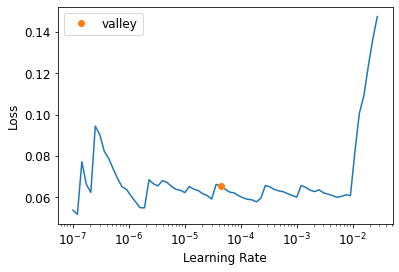

In [21]:
learn.unfreeze()
learn.lr_find()

In [23]:
learn_lm = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

In [24]:
learn_lm.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.668345,0.610115,0.310680,0.689320,1.840642,00:03


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.498244,0.480989,0.237864,0.762136,1.617673,00:07
1,0.459076,0.384980,0.150485,0.849515,1.469586,00:07
2,0.439477,0.294448,0.097087,0.902913,1.342385,00:07
3,0.399046,0.314989,0.106796,0.893204,1.370244,00:07
4,0.360197,0.314229,0.101942,0.898058,1.369204,00:07
5,0.317154,0.304595,0.131068,0.868932,1.356076,00:07
6,0.283195,0.235173,0.067961,0.932039,1.265128,00:07
7,0.244936,0.303340,0.111650,0.888350,1.354375,00:07
8,0.215768,0.286909,0.097087,0.902913,1.332303,00:07
9,0.193435,0.283553,0.101942,0.898058,1.327839,00:07


In [25]:
df_val = pd.concat([df_train, df_test])

In [26]:
df_val

,class,text,text_tags,binder,docid
0,FirstPage,"Dr. M.A. Manzelli, PHILIP MORRIS INC., Research Center, P.O. Box 3 D Richmond, Va. 23206 U.S.A. Dear Art, Please find enclosed a proposed program for your visit in Europe. As you will see, this program contains two major points: a) A two-days meeting in Neuchätel with all people in Europe involved in infestation control (proposed program included). b) Visit of all PM Europe production centers with the purpose of: - training people in Charge of the insect indenti-fication - inspection of the sanitary conditions One of our main problems is the insect Identification and ...","['\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob PHILIP MORRIS\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob EUROPE MIDDLE EAST AFRICA\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob RESEARCH AND DEVELOPMENT\n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_02 xxbob Neuchatel, duly 14, 1977\n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_01 xxbob Dr. M.A. Manzelli,\n', 'PHILIP MORRIS INC.,\n', 'Research Center,\n', 'P.O. Box 3 D\n', 'Richmond, Va. 23206\n', 'U.S.A. .\n', 'xxeob xxQ02_01\n', '\n', 'xxQ02_01 xxbob Dear Art,\n', 'xxeob xxQ02_01\n', '\n', 'xxQ03_01 xxbob xxbcet Please proposed pro...",NaN,NaN
1,NextPage,"- 2 - Please let me krow if you have any changes for the proposed program. Looking forward to seeing you again, cc: Messrs. B. Kuhn E. Stoop Encl.: mentioned 1000035625","['\n', 'xxQ00_00 xxbob Please let krow if you have any changes for the proposed\n', 'me\n', 'program.\n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_00 xxbob Looking forward to seeing you again,\n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_02 xxbob Yours very truly,\n', '_.\n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_02 xxbob xxbcet \n', 'xxecet\n', 'xxeob xxQ02_03\n', '\n', 'xxQ02_02 xxbob .B. Boder\n', 'xxeob xxQ02_03\n', '\n', 'xxQ02_00 xxbob cc: Messrs. B. Kuhn\n', 'xxbcet E. Stoop\n', 'xxecet\n', 'xxeob xxQ02_01\n', '\n', 'xxQ02_00 xxbob Encl.: mentioned\n', 'xxeob xxQ03_01\n', '\n', 'xxQ04_01 xxbob we\n',...",NaN,NaN
2,FirstPage,"I NOIJ-04-97 13 = 25 FROM = I D : PAGE 10/17 Wachtell, Lipton, Rosen & Katz MARTIN L1PTON HERBERT M. WaCHYCLL THEODORE GEWSRTZ »ERNA*» W, NUSSBAUM RICHARD O- HATCHER DOUGLAS Sr LieBKAfSKV STEVEN M. SAR NA CMARt.CS T. MEPCRR'GK CHAIN J. FOPTCANG pBTRR C. 1AMCLLDS MICHAEL w. SCHWÄRT* Al.LAR A- MARTIN BARRV A. BRrCR IAWREHCE □. PEDQrWITZ ROBERT 0. MAZUR PAUL VIZGARRÖMSCK JR. PCTCR G- HCIM hAROlD s. «OViKOFF DAVID M. EINHORN KENNET« B. FQRREST METER C. KOPLOW THEODORE M- MIRVIS EDWARD D. MERL1HT RICHARD D. FEINTUCH DANIEL A. NEPP ERIC M. ROTR WAHREN R. STERN ANDREW R. BROWN ST EIN MICHAEL H...","['\n', 'xxQ00_00 xxbob NOU-04-87 15:26 FROM:\n', 'e\n', 'xxeob xxQ00_01\n', '\n', 'xxQ00_00 xxbob MARTIN LIPTON\n', 'MERBERY ot waAcHTELL\n', 'TNROPORE GGWERTZ\n', 'BEAWARD W. NUSSRAUM\n', 'RIGMARD D. KATOKER\n', 'COUCLAT Fr MERHAPEKY\n', 'STEVEN M. GARNA\n', 'CMARLES T. MEDERRICK\n', 'SAIN y. FORTEANG\n', 'PeveR &. CANCLLOS\n', 'HIGMASR We SCRWARTE\n', 'ALLAN A. MARTIN\n', 'BARRY 4. BRYER\n', 'LAWRENCE 5. PEDOWITZ\n', 'ROBERT ©. haZUR\n', 'PAUL VIZGARRONDG, J.\n', 'PRIGR G. MEIN\n', 'MARGLD & HOVIKOFF\n', 'DAVID H. EERHORK\n', 'KENNETH B. PORREST\n', 'KEYER ¢. KOPLOW\n', 'THEODORE N. MIRV...",NaN,NaN
3,FirstPage,"i PHILIP .MORRIS INCORPORATED 120 PARK AVENUE, N EW YORK. N. Y. 10017 John T.-Landhy SENIOR VICC PRESIDENT _ , r . n n - . oirector of Marketing February 15, 19 83 Dear Ms. Ober: Your letter of February 3 was received by this Office yesterday. We attempted to reach you by telephone iinmediately but were unable to find a listed number in New Haven. I had hoped to arrange an appointment for one of our executives to discuss with you and your concerned ...","['\n', 'xxQ00_00 xxbob ee\n', 'xxeob xxQ00_00\n', '\n', 'xxQ00_01 xxbob PHILIP MORRIS\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob INCORPORATED\n', '120 PARK AVENUE, NEW YORK.N. ¥. 10017\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob Joun T.-Lanpry\n', 'xxbcet ee or ne February 15,

##Validation

In [27]:
# create dataloader of test
dblock_test = DataBlock(
    blocks=(TextBlock.from_df('text', seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dloader_test = dblock_test.dataloaders(df_test, bs=64)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [28]:
test_dl = dloader_test.test_dl(df_test['text'])
preds = learn.get_preds(dl=test_dl, with_decoded=True)

In [29]:
len(preds)

3

In [30]:
learn.validate()

(#4) [0.29752275347709656,0.10194174945354462,0.8980582356452942,1.3465189933776855]

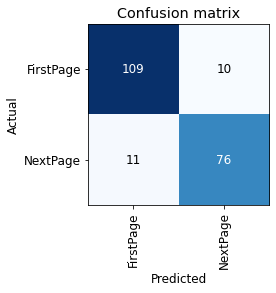

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()